<a href="https://colab.research.google.com/github/estrickler1/CSPMA4413/blob/main/StricklerEthan_CPSMA4413_Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Project 7: Reimann Sum Integral, Professor Njacob, Numerical Methods Course

The authors of this code

Chiran Rayamajhi

Bigyan Sharma

Ethan Strickler

Watan Chadhaury

In [4]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import pandas as pa
from scipy import integrate

To solve the integration of our function, sin(X), by hand; we must take the following steps.

$$
\begin{align}
A = \int_0^\pi \sin x \ dx\\
A = -\cos x\vert_0^\pi\\
A = -\cos\pi+\cos 0\\
A = -(-1) + 1\\
A = 2 
\end{align}
$$

In [5]:
Pi = m.pi
Function = lambda x: m.sin(x)
FunctionIntergration = integrate.quad(Function, 0, Pi)

In [6]:
FunctionIntergration

(2.0, 2.220446049250313e-14)

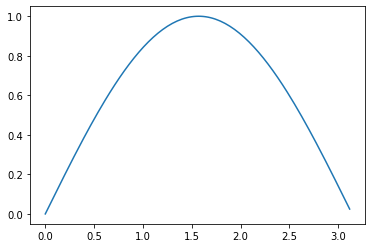

In [7]:
x = np.arange( 0, Pi, Pi/128)
plt.plot(x, np.sin(x))

#Riemann Sum
In mathematics, Integration can be defined as a way to find the area under a curve from one point to another. It is represented by
$$
\begin{align}
A = \int_a^b F (x) \ dx\\

\end{align}
$$

**Riemann sum** is a certain kind of approximation of an integral by a finite sum. It gives us a method for computing an approximation of an integral and also helps us to define the integral. 
A Riemann sum of a function *F(X)* over a partition $ X_0=a<X_1<........Xn-1<X_n=b $  is sum of 
$$
\begin{align}
\sum_i^n f(x_i^*) (x_i-x_(i-1)) , x_i^*          \\
   [:~x_(i-1), x_i]
\end{align}
$$
Where each value $  x_i^* $ in each subinterval is arbitrary.

The value  $  x_i^* $ chosen in each subinterval is arbitrary however there are certain obvious choices:
*   A left Riemann sum is when each $  x_i^* =x_(i-1) $  is the left endpoint of the subinterval [$x_(i-1), x_i$]
*   A right Riemann sum is when each $  x_i^* =x_i $ is the right endpoint of the subinterval [$x_(i-1), x_i$]
*   A midpoint Riemann sum is when each $  x_i^* = ((x_(i-1)+x_i)/2 $ is the midpoint of the subinterval [$x_(i-1), x_i$]





In simple words, drawing the rectangles underneath the curve on the graph helps to find the value of integral by adding the areas of those rectangles and also tells us whether the values were over-estimated or under-estimated or equal.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
dx = (b-a)/N
x_left = np.linspace(a,b-dx,N)
x_midpoint = np.linspace(dx/2,b - dx/2,N)
x_right = np.linspace(dx,b,N)

print("Partition with",N,"subintervals.")
left_riemann_sum = np.sum(f(x_left) * dx)
print("Left Riemann Sum:",left_riemann_sum)

midpoint_riemann_sum = np.sum(f(x_midpoint) * dx)
print("Midpoint Riemann Sum:",midpoint_riemann_sum)

right_riemann_sum = np.sum(f(x_right) * dx)
print("Right Riemann Sum:",right_riemann_sum)

NameError: ignored

Calculating errors in the estimate using several different numbers of rectangles

In [ ]:
def riemann_sum(f,a,b,N,method='midpoint'):           #Calculating error taking midpoint as the base
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")

In [ ]:
riemann_sum(np.sin,0,np.pi,100)                 #Mid-point Riemann sum

In [ ]:
riemann_sum(np.sin,0,np.pi,100,'right')         #right Riemann sum

In [ ]:
riemann_sum(np.sin,0,np.pi,100,'left')          #left Riemann sum

In [ ]:
f = lambda x : sin(X) #using riemann mid point for the graph
a = 0; b = 5; N = 100
n = 100
f = lambda x: np.sin(x)

x = np.linspace(0,2*np.pi,100)
y = f(x)
plt.plot(x,y)

X = np.linspace(np.pi/2,3*np.pi/2,100)
Y = f(X)
plt.fill_between(X,Y)

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=2)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.show()

Simpsons 1/3 rule


In [10]:
def simpson(Function, a, b , n):
  def Deltax(a,b,n):
    return (b-a)/n

  X = Deltax(a,b,n)
  sum = 0
  for I in range(2,n,8):
    sum = sum + 4*Function(a+X*I)
  for I in range(0,n,4):
    sum = sum + 2*Function(a+X*I)
  for I in [a,b]:
    sum = sum + Function(I)
  sum = X /3 *sum 
  return sum

In [ ]:
simpson(np.sin, 2 ,8,4)

#Findings
Here, we have used $ sin(x) $ as our example. After using the Riemann sum in the $ sin(x) $. We found that the mid-point was  the exact value of the $ sin(x) $ i.e. 2. In this function i.e. $ sin(x), $ all the endpoints were **overestimated** where as  the center endpoints were almost close to the actual value. We came to a conclusion from observing the rectangle in the graph if the rectangle falls under the curve then the endpoints are underestimated and ,if it lies over the curve , they are overestimated. 

Given, an strictly increasing function we would choose the function $ f(x)=sin(x)+cos(x) on [0,2\pi] $. Here, we  will choose the algorithm Riemann sum midpoint rule. Here, $f(x)$ is increasing on $ [0,\pi/4] $ and decreasing on $[\pi/4, 5\pi/4] $ 

As, we also know Reimann Sum have some drawbacks. It doesnt behave nicely with respect to point-wise limits. for example, the integration of function f(x)dx=0, the f converges pointwise to 1 [0,1], which is not even Riemann integrable. Similarly, the conclusion can also be drawn from Reimann sum graph that it always have minimum values on the left side , so is underestimate and right side has the maximum values , so is overestimate.